# **E1E122020 - MUH. FALAH MUBARAQ**

**Membaca file CSV ke dalam sebuah DataFrame menggunakan library Pandas**

In [1]:
import pandas as pd  #Mengimpor library Pandas, Aliasnya pd supaya mempersingkat.

df = pd.read_csv('/content/nikedidas.csv')  #Membaca file CSV yang terletak di '/content/train.csv' dan menyimpannya ke dalam DataFrame df.
df.head()  #Menampilkan lima baris pertama dari DataFrame df.

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72


**Melihat tipe datanya, apakah masih ada data yang berbentuk kategorik atau tidak**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3268 non-null   object 
 1   Product ID     3268 non-null   object 
 2   Listing Price  3268 non-null   int64  
 3   Sale Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Rating         3268 non-null   float64
 7   Reviews        3268 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 204.4+ KB


**Menghapus atribut yang tidak digunakan dalam clustering**

In [3]:
df.drop(['Product ID', 'Product Name', 'Brand', 'Discount', 'Listing Price', 'Reviews'], axis=1, inplace=True)


In [4]:
df.head()

,Sale Price,Rating
0,7499,4.8
1,3799,3.3
2,599,2.6
3,3499,4.1
4,3999,3.5


**Melakukan Standardization agar skalanya atributnya sama menggunakan metode StandardScaler dari library SL**

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Sale Price', 'Rating']])

df[['Sale Price', 'Rating']] = scaled_features


In [7]:
df.head()

,Sale Price,Rating
0,0.317928,1.090476
1,-0.544022,0.040524
2,-1.289493,-0.449453
3,-0.613910,0.600498
4,-0.497431,0.180518


In [8]:
from sklearn.cluster import KMeans

clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(df)
  clusters.append(km.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

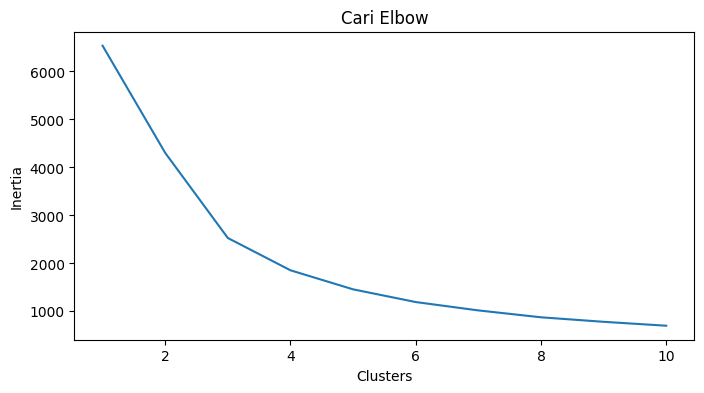

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [10]:
# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
# menambahkan kolom label pada dataset
df['Labels'] = km5.labels_

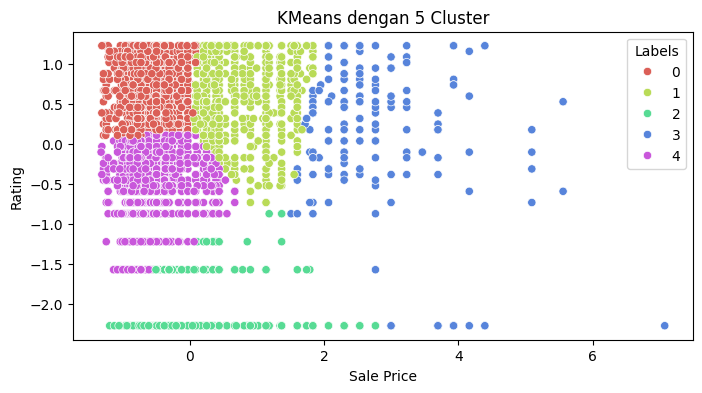

In [12]:
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=df['Sale Price'], y=df['Rating'], hue=df['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()